# Proyecto Final de Data Science con Phyton
## Modelo Predictivo de Precios de Casas con Regresión Líneal
### Luis Edmundo Alvarez Soto Carné 21001844

In [1]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
#pip install scikit-learn
import sklearn as sk

In [2]:
def f_spgraph(p_x, p_y,p_title,p_xlabel, p_ylabel):
    plt.figure(figsize = (9, 6))
    sns.scatterplot(x = p_x, y = p_y, color = 'mediumseagreen')
    plt.title(p_title, fontdict = {'fontsize':15})
    maxDist = max(max(p_y), max(p_x)) # Code from Mahdi's lecture
    minDist = min(min(p_y), min(p_x)) # Code from Mahdi's lecture
    #sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7) # Similar to Mahdi's code, but done with Seaborn
    plt.xlabel(p_xlabel, fontdict= {'fontsize':13})
    plt.ylabel(p_ylabel, fontdict= {'fontsize':13})
    plt.tight_layout();

In [3]:
#importar archivo
datos = np.load("proyecto_training_data.npy")

In [4]:
# Transformación del data set en un data frame
df = pd.DataFrame(datos,columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
  
# print DataFrame
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


## Análisis Exploratorio de datos en el DataFrame

In [5]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Gráficas de cada Variable

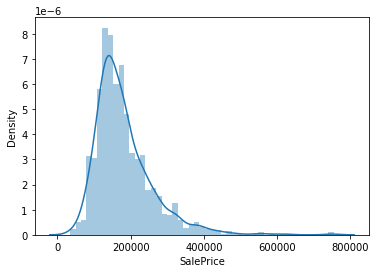

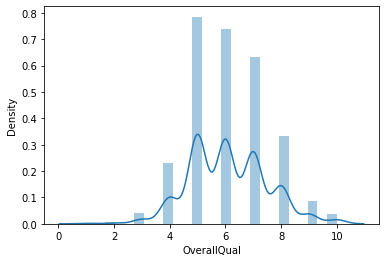

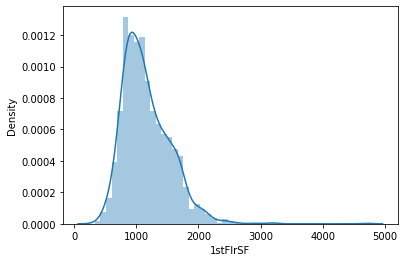

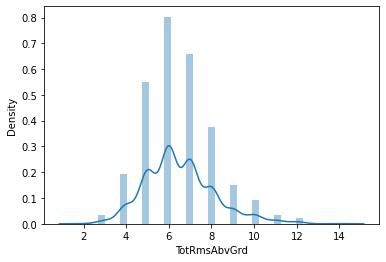

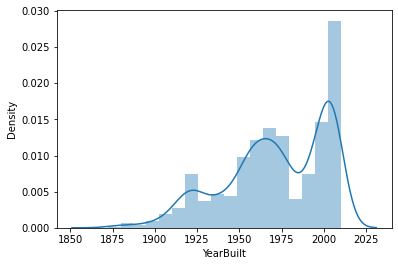

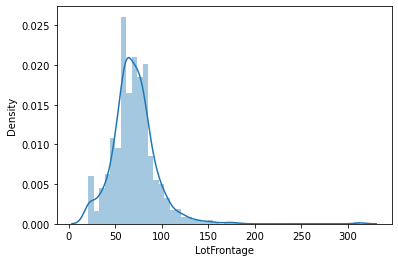

In [6]:
# desactiva mensajes futureWarnings
import warnings
warnings.filterwarnings("ignore")
# create distplots
for column in df.columns:
    plt.figure()
    sns.distplot(df[column])

## Coeficiente de correlación entre el Precio y demás variables

In [75]:
from scipy import stats
from scipy.stats import pearsonr
    

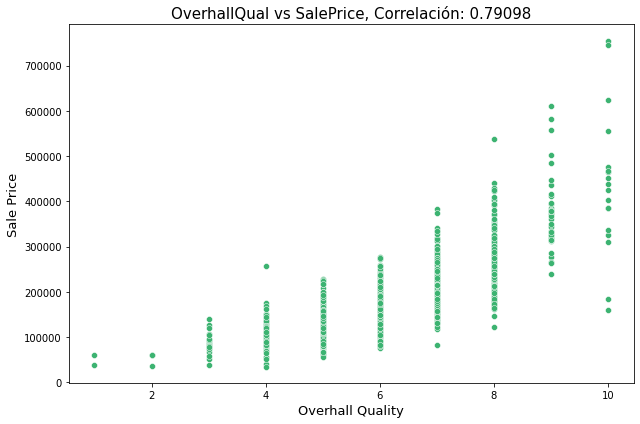

In [76]:
v_corr_oq = round(df['SalePrice'].corr(df['OverallQual'], method='pearson'),5)
#f_spgraph(df['SalePrice'], df['OverallQual'],'SalePrice vs OverhallQual, Correlación: '+ str(v_corr_oq),'Sale Price', 'Overhall Quality')
f_spgraph(df['OverallQual'],df['SalePrice'], 'OverhallQual vs SalePrice, Correlación: '+ str(v_corr_oq), 'Overhall Quality','Sale Price')

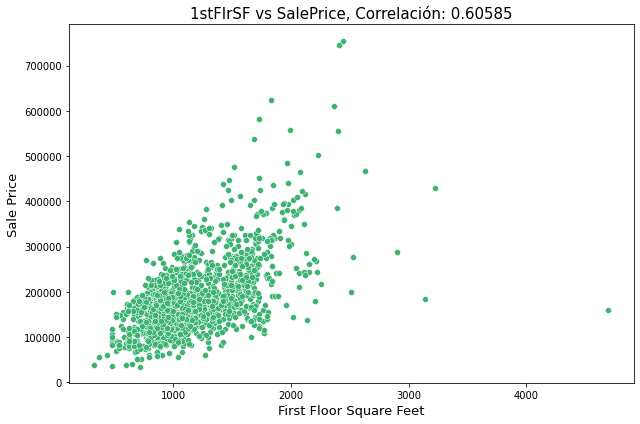

In [77]:
v_corr_ff = round(df['SalePrice'].corr(df['1stFlrSF'], method='pearson'),5)
#f_spgraph(df['SalePrice'], df['1stFlrSF'],'SalePrice vs 1stFlrSF, Correlación: '+ str(v_corr_ff),'Sale Price', 'First Floor Square Feet')
f_spgraph(df['1stFlrSF'],df['SalePrice'],'1stFlrSF vs SalePrice, Correlación: '+ str(v_corr_ff), 'First Floor Square Feet','Sale Price')

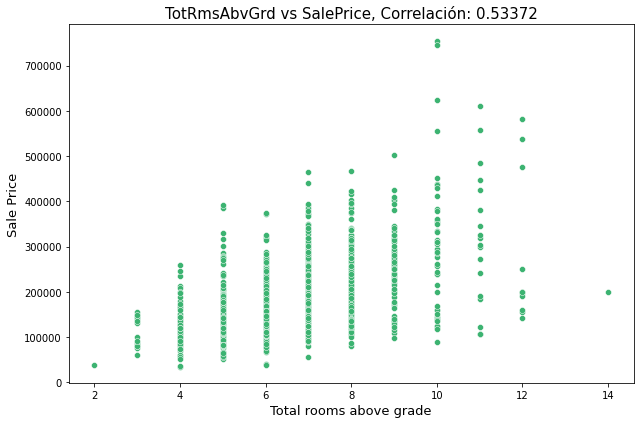

In [78]:
v_corr_ar = round(df['SalePrice'].corr(df['TotRmsAbvGrd'], method='pearson'),5)
f_spgraph(df['TotRmsAbvGrd'],df['SalePrice'], 'TotRmsAbvGrd vs SalePrice, Correlación: '+ str(v_corr_ar),'Total rooms above grade', 'Sale Price')

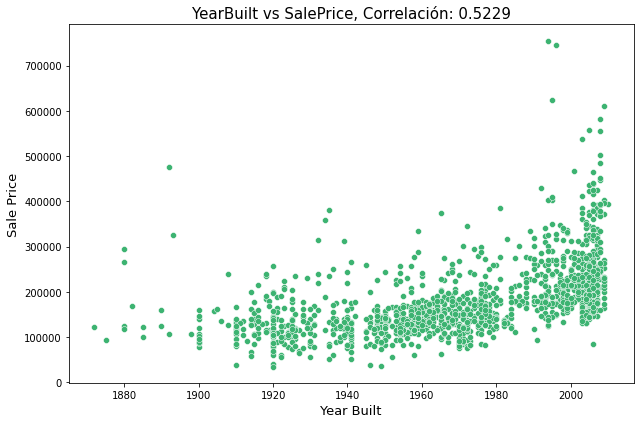

In [79]:
v_corr_yb = round(df['SalePrice'].corr(df['YearBuilt'], method='pearson'),5)
f_spgraph(df['YearBuilt'],df['SalePrice'],'YearBuilt vs SalePrice, Correlación: '+ str(v_corr_yb), 'Year Built','Sale Price')

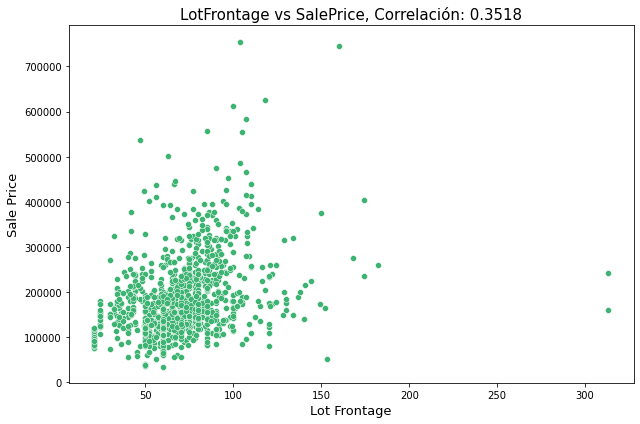

In [81]:
v_corr_lf = round(df['SalePrice'].corr(df['LotFrontage'], method='pearson'),5)
f_spgraph(df['LotFrontage'],df['SalePrice'],'LotFrontage vs SalePrice, Correlación: '+ str(v_corr_lf), 'Lot Frontage','Sale Price')

**Nota** las variables con más correlación respecto al Sale Price son: *Overhall Quality (0.79098) y First Floor Square feet (0.60585)*

## Separación del Set de Datos para Entrenamiento y de Pruebas 

In [66]:
#verificación de tamaño de archivo
numrows, numcols = datos.shape;
testrows = int(numrows * 0.8);
print("shape of data:",df.shape)
print("Rows: ",numrows,testrows)
print("Cols: ",numcols)

shape of data: (1460, 6)
Rows:  1460 1168
Cols:  6


In [67]:
print(df[:testrows])

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]


In [203]:
datatrain = df[:testrows]
datatest = df[testrows:]
print("shape of datatrain:",datatrain.shape)
print("shape of datatest:",datatest.shape)


shape of datatrain: (1168, 6)
shape of datatest: (292, 6)


### Función de entrenamiento del Modelo de Regresión líneal y = mx + b

In [168]:
def f_matrizones(x):
    filas=np.shape(x)
    
    #print(filas)
    s = (filas[0],2)
    #print("s",s)
    v_m = np.ones(s)
    for i in range(len(v_m)):
        v_m[i][0] = v_m[i][0] * x[i]
    #v_m = np.ones(s)
    return v_m

In [199]:
def f_trainlr(x, y, epochs, ierror, lr, m, b):
    # inicializa vector de parámetros con m y b igual a cero
    v_param = np.array([m,b])
    #print(v_param)
    epoch = 1
    # Crea matriz de entranimiento con columna concatenada con valores 1 para poder utilizar Matmul
    m_train = f_matrizones(x)
    #Diccionario para modelo resultante
    d_param = {}
    #vector del promedio de errores
    v_errores = []
    while epoch <= epochs:
        # Mutiplica la matriz de entramiento con el vector de parámetros
        yhat = np.matmul(m_train,v_param)

        # Resta de valor estimado (yhat) & valor esperado y
        yhat_y = np.subtract(yhat,y/1000)

        # calcula error
        error = np.power(yhat_y,2)/2

        # calcula promedio del error de la iteración
        erravg = np.mean(error)
        # agrega el error al vector
        v_errores.append(erravg)

        # calcula gradientes de m y b
        gradm = np.mean(x* yhat_y)*lr
        gradb = np.mean(yhat_y)*lr
        v_grad = np.array([gradm,gradb])
        
        # asigna nuevos parámetros a la siguiente iteración
        v_param = v_param - v_grad

        # agrega vector de parámetro al diccionario
        d_param[epoch+1] = v_param

        # evalúa si imprime o no la iteración y el promedio del error
        if epoch % ierror == 0:
            print("Iteración y error: ", epoch,erravg)
        epoch+=1
    return d_param, v_errores


In [229]:
def f_plotgraph(px,py,ptitle,pxlabel,pylabel):
    plt.plot(np.linspace(0,len(py),len(py)),px)
    plt.title(ptitle)
    plt.xlabel(pxlabel)
    plt.ylabel(pylabel)
    plt.show()

Iteración y error:  150000 1391.3806952065897


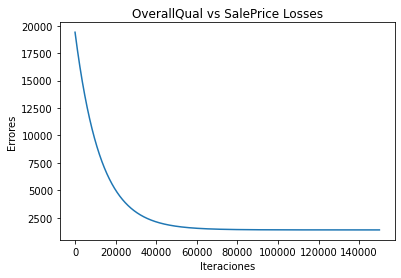

In [230]:
# parámetros f_trainlr(x, y, epochs, ierror, lr, m, b):
p_param, p_errores = f_trainlr(datatrain['OverallQual'], datatrain['SalePrice'], 150000, 150000, 0.000001, 0,0)
#parámetros f_grafica(px,py,ptitle,pxlabel,pylabel)
f_plotgraph(p_errores,p_param,'OverallQual vs SalePrice Losses','Iteraciones','Errores')

Iteración y error:  100 1968.0930052556907


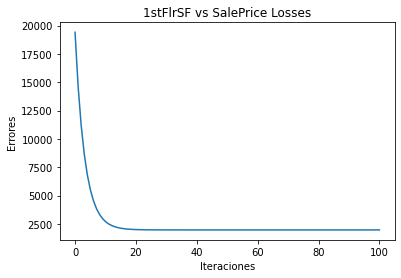

In [231]:
# parámetros f_trainlr(x, y, epochs, ierror, lr, m, b):
p_param, p_errores = f_trainlr(datatrain['1stFlrSF'], datatrain['SalePrice'], 100, 100, 0.0000001, 0,0)
#parámetros f_grafica(px,py,ptitle,pxlabel,pylabel)
f_plotgraph(p_errores,p_param,'1stFlrSF vs SalePrice Losses','Iteraciones','Errores')